# 1. Sampling Distribution & C.I. (parameter estimation)

## What is the sampling distribution? It's the distribution of any 'statistics'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
 
coffee_full = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/coffee_dataset.csv')

# this is the only data you might actually get in the real world.
coffee_red = coffee_full.sample(200)

# We just use a bootstrapping to build a confidence interval !

In [ ]:
coffee_full.head() # this is unapproachable population !

In [ ]:
coffee_full.shape

In [ ]:
coffee_red.head() # this is a bootstrapping samples ! 

In [ ]:
coffee_red.shape

In [ ]:
# 1. What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?
coffee_red.drinks_coffee.mean() 

### How to build a C.l. using the sampling distribution of the statistic that best estimates parameter of interest ? 

#### In this case, we used a sample mean height to estimate the population mean height.

In [ ]:
# 2. Of the individuals who drink coffee, what is the average height? 
# Of the individuals who do not drink coffee, what is the average height? 
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean() #68.324
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean() #65.864

In [ ]:
# 3. Simulate 200 "new" individuals from your original sample of 200. 
bootsamp = coffee_red.sample(200, replace=True)

# What are the proportion of coffee drinkers in your bootstrap sample? 
bootsamp['drinks_coffee'].mean()
# What are the mean height of coffee drinkers in your bootstrap sample? 
bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
# No!!! bootsamp['drinks_coffee']['height'].mean()

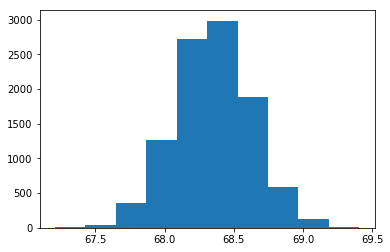

In [2]:
# 4. Now simulate your bootstrap sample 10,000 times and take the mean height of the coffee drinkers in each sample. 
# Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values 
#necessary for a "95% confidence interval". What do you notice about the sampling distribution of the mean in this example?

boot_means = []

for i in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

### We are 95% confident, the population mean falls between the bounds. 

In [ ]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

#### And this one is the real parameter value from the population!

In [ ]:
coffee_full[coffee_full['drinks_coffee'] == True]['height'].mean()

### Did your interval capture the actual average height of coffee drinkers in the population? Look at the average in the population and the two bounds provided by your 95% confidence interval. Notice that the percent and the parameter can both change depending on what you are building your confidence interval for, and what percentage you cutoff in each tail.

#


# 2. Sampling Distribution & C.I. (Difference in parameters: Comparison)

### What is the difference in the mean height for coffee VS. non-coffee-drinkers ?

### 1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. 

In [ ]:
diffs = []

for i in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diffs.append(coff_mean - nocoff_mean)
    
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)  # statistical evidence coffee drinkers are on average taller

### 2. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old. Build a 95% confidence interval. 

In [ ]:
diffs_coff_under21 = []

for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_coff_mean - under21_nocoff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

## Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller. But, when combined, we saw that on average coffee drinkers were on average taller. This is again Simpson's paradox. 

## we can be 95% confident that the difference in the average heights for coffee drinkers as compared to non-coffee drinkers was in the provided interval of [ ] to [ ] inches.

### So Why Bootstrapping? 

#### when we don't have enough sample size, we useally go with the traditional method...using t-test. but it turns out that bootstrapping also gives identical result as the traditional method!  

In [3]:
# traditional method of mean comparison

import statsmodels.stats.api as sm

X1 = coffee_red[coffee_red['drinks_coffee'] == True]['height'] 
X2 = coffee_red[coffee_red['drinks_coffee'] == False]['height']

cm = sm.CompareMeans(sm.DescrStatsW(X1), sm.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

(1.5218492547539006, 3.0932002249570325)